# Imports 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display
import warnings; warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
SEED = 42
rng = np.random.default_rng(SEED)

#  Load Data

In [2]:
charging = pd.read_csv("/kaggle/input/global-ev-charging-stations/charging_stations_2025_world.csv")
country = pd.read_csv("/kaggle/input/global-ev-charging-stations/country_summary_2025.csv")
ev_models = pd.read_csv("/kaggle/input/global-ev-charging-stations/ev_models_2025.csv")
world = pd.read_csv("/kaggle/input/global-ev-charging-stations/world_summary_2025.csv")

# Summarize Helper

In [3]:
def summarize(df, name):
    
    print(f"=== {name} ===")
    
    print("Shape:", df.shape, "\n")
    
    print("Info:")
    df.info()
    print("\n")
    
    print("Describe:")
    display(df.describe(include="all").transpose())
    print("\n")
    
    print("Head:")
    display(df.head())
    print("\n" + "="*60 + "\n")

# --- Summaries ---
summarize(charging, "Charging Stations")
summarize(country, "Countries")
summarize(ev_models, "EV Models")
summarize(world, "World Summary")


=== Charging Stations ===
Shape: (242417, 11) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242417 entries, 0 to 242416
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              242417 non-null  int64  
 1   name            242417 non-null  object 
 2   city            220228 non-null  object 
 3   country_code    242416 non-null  object 
 4   state_province  172419 non-null  object 
 5   latitude        242417 non-null  float64
 6   longitude       242417 non-null  float64
 7   ports           242417 non-null  int64  
 8   power_kw        237757 non-null  float64
 9   power_class     242417 non-null  object 
 10  is_fast_dc      242417 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 18.7+ MB


Describe:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,242417.0,NaN,NaN,NaN,204039.926519,101789.186799,2389.0,122882.0,208085.0,280795.0,460650.0
name,242417,225282,Shell Recharge/Ubitricity,1166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,220228,41815,London,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,242416,120,US,82138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_province,172419,5988,CA,17528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,242417.0,NaN,NaN,NaN,43.253894,12.692335,-55.811599,38.859333,44.414623,51.41389,81.736061
longitude,242417.0,NaN,NaN,NaN,-32.07416,57.652645,-164.848855,-81.644018,-2.867264,7.883693,178.369254
ports,242417.0,NaN,NaN,NaN,1.959277,3.931007,-4.0,1.0,1.0,2.0,503.0
power_kw,237757.0,NaN,NaN,NaN,35.253735,2051.557432,0.0,3.7,11.0,22.0,1000000.0
power_class,242417,6,AC_L1_(<7.5kW),107144,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Head:


,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
0,307660,Av. de Tarragona,Andorra,AD,NaN,42.505254,1.528861,10,300.0,DC_ULTRA_(>=150kW),True
1,301207,Parquing Costa Rodona,Encamp,AD,NaN,42.537213,1.727014,10,22.0,AC_HIGH_(22-49kW),False
2,301206,Hotel Naudi,NaN,AD,NaN,42.576811,1.666061,1,11.0,AC_L2_(7.5-21kW),False
3,301205,Hotel Piolets Soldeu Centre,NaN,AD,NaN,42.576466,1.667317,1,22.0,AC_HIGH_(22-49kW),False
4,301204,Hotel Serras,NaN,AD,NaN,42.579458,1.659215,3,11.0,AC_L2_(7.5-21kW),False




=== Countries ===
Shape: (122, 2) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  121 non-null    object
 1   stations      122 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


Describe:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_code,121,121,US,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stations,122.0,NaN,NaN,NaN,1987.032787,8420.817716,1.0,5.25,52.5,531.5,82138.0




Head:


,country_code,stations
0,US,82138
1,GB,26825
2,DE,23373
3,ES,17825
4,CA,16490




=== EV Models ===
Shape: (63, 7) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   make            63 non-null     object
 1   model           63 non-null     object
 2   market_regions  63 non-null     object
 3   powertrain      63 non-null     object
 4   first_year      63 non-null     int64 
 5   body_style      63 non-null     object
 6   origin_country  63 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.6+ KB


Describe:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make,63,33,Tesla,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,63,63,Model S,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_regions,63,29,EU/UK,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,63,1,BEV,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_year,63.0,NaN,NaN,NaN,2020.428571,2.486832,2010.0,2020.0,2021.0,2022.0,2025.0
body_style,63,11,SUV,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_country,63,14,US,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Head:


,make,model,market_regions,powertrain,first_year,body_style,origin_country
0,Tesla,Model S,Global (US/EU/UK/ME),BEV,2012,Sedan,US
1,Tesla,Model 3,Global (US/EU/UK/ME/CN),BEV,2017,Sedan,US
2,Tesla,Model X,Global (US/EU/UK/ME),BEV,2015,SUV,US
3,Tesla,Model Y,Global (US/EU/UK/ME/CN),BEV,2020,SUV,US
4,Tesla,Cybertruck,US (limited),BEV,2023,Pickup,US




=== World Summary ===
Shape: (122, 4) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      121 non-null    object 
 1   country           122 non-null    object 
 2   count             122 non-null    int64  
 3   max_power_kw_max  118 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


Describe:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_code,121,121,US,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,122,122,United States,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,122.0,NaN,NaN,NaN,2035.204918,8616.963391,1.0,5.25,57.0,564.0,83821.0
max_power_kw_max,118.0,NaN,NaN,NaN,8710.432203,92035.801103,7.0,72.75,180.0,357.5,1000000.0




Head:


,country_code,country,count,max_power_kw_max
0,US,United States,83821,600.0
1,GB,United Kingdom,27437,560.0
2,DE,Germany,24465,400.0
3,CA,Canada,18203,400.0
4,ES,Spain,17864,1000.0


# Data Cleaning

## Missing & Duplicates


In [4]:
print("=== Missing Values ===")
for df, name in [(charging,"Charging"), (country,"Country"),
                (ev_models,"EV Models"), (world,"World")]:
    print(f"\n{name}")
    print(df.isna().sum())  

print("\n=== Duplicates ===")
print("Charging:", charging.duplicated().sum())
print("Country:", country.duplicated().sum())
print("EV Models:", ev_models.duplicated().sum())
print("World:", world.duplicated().sum())

=== Missing Values ===

Charging
id                    0
name                  0
city              22189
country_code          1
state_province    69998
latitude              0
longitude             0
ports                 0
power_kw           4660
power_class           0
is_fast_dc            0
dtype: int64

Country
country_code    1
stations        0
dtype: int64

EV Models
make              0
model             0
market_regions    0
powertrain        0
first_year        0
body_style        0
origin_country    0
dtype: int64

World
country_code        1
country             0
count               0
max_power_kw_max    4
dtype: int64

=== Duplicates ===
Charging: 0
Country: 0
EV Models: 0
World: 0


## Clean Data

In [5]:
# Fill missing city/state with "Unknown"
charging["city"] = charging["city"].fillna("Unknown")
charging["state_province"] = charging["state_province"].fillna("Unknown")

# Fill missing power with median 
charging["power_kw"] = charging["power_kw"].fillna(charging["power_kw"].median())

# Drop rows with no country_code 
charging = charging.dropna(subset=["country_code"])
country = country.dropna(subset=["country_code"])


In [6]:
charging["country_code"] = charging["country_code"].astype("category")
if "power_class" in charging.columns:
    charging["power_class"] = charging["power_class"].astype("category")
charging["is_fast_dc"] = charging["is_fast_dc"].astype(bool)

print("Charging shape:", charging.shape)
print("Country shape:", country.shape)
print("EV Models shape:", ev_models.shape)
print("World shape:", world.shape)

Charging shape: (242416, 11)
Country shape: (121, 2)
EV Models shape: (63, 7)
World shape: (122, 4)


# Sanity Checks

In [7]:
charging = charging[(charging["latitude"].between(-90, 90)) &
                    (charging["longitude"].between(-180, 180))]

print("Realistic max power_kw (P99.5):", charging["power_kw"].quantile(0.995))
print("99th percentile power_kw:", charging["power_kw"].quantile(0.99))


Realistic max power_kw (P99.5): 350.0
99th percentile power_kw: 350.0


# Feature Engineering

In [8]:
charging["station_type"] = charging["is_fast_dc"].map({True:"Fast DC", False:"Normal / AC"})

# Buckets
power_bins   = [0, 22, 50, 150, 350, np.inf]
power_labels = ["≤22kW AC","22–50kW DC","50–150kW DC","150–350kW DC","Ultra >350kW"]

power_kw_viz = charging["power_kw"].clip(upper=charging["power_kw"].quantile(0.995))
power_bucket_viz = pd.cut(power_kw_viz, bins=power_bins, labels=power_labels)




# Country Dashboard

In [9]:
country_dash = (charging.groupby("country_code")
    .agg(
        stations=("id","count"),
        ports=("ports","sum"),
        avg_ports=("ports","mean"),
        fast_share=("is_fast_dc","mean"),
        p99_power=("power_kw", lambda s: s.quantile(0.99))
    ).reset_index())
country_dash["fast_share_pct"] = (country_dash["fast_share"]*100).round(1)


top_city = (charging.groupby(["country_code","city"])
            .size().reset_index(name="stations_city")
            .sort_values(["country_code","stations_city"], ascending=[True, False])
            .drop_duplicates("country_code"))
country_dash = country_dash.merge(top_city[["country_code","city","stations_city"]],
                                  on="country_code", how="left")

display(country_dash.head(10))

,country_code,stations,ports,avg_ports,fast_share,p99_power,fast_share_pct,city,stations_city
0,AD,96,259,2.697917,0.062500,186.00,6.2,Unknown,22
1,AE,131,346,2.641221,0.175573,250.00,17.6,Dubai,59
2,AF,1,1,1.000000,0.000000,22.00,0.0,Ostholstein,1
3,AL,15,16,1.066667,0.600000,174.68,60.0,Tirane,4
4,AM,4,6,1.500000,0.250000,146.16,25.0,Ереван,3
5,AR,22,36,1.636364,0.954545,157.90,95.5,Unknown,12
6,AT,1282,3474,2.709828,0.176287,350.00,17.6,Wien,87
7,AU,1241,2701,2.176471,0.533441,350.00,53.3,Unknown,88
8,AX,3,5,1.666667,0.666667,50.00,66.7,Mariehamn,2
9,AZ,2,2,1.000000,0.500000,59.51,50.0,Baku,1


# EDA

## Global Distribution of Stations

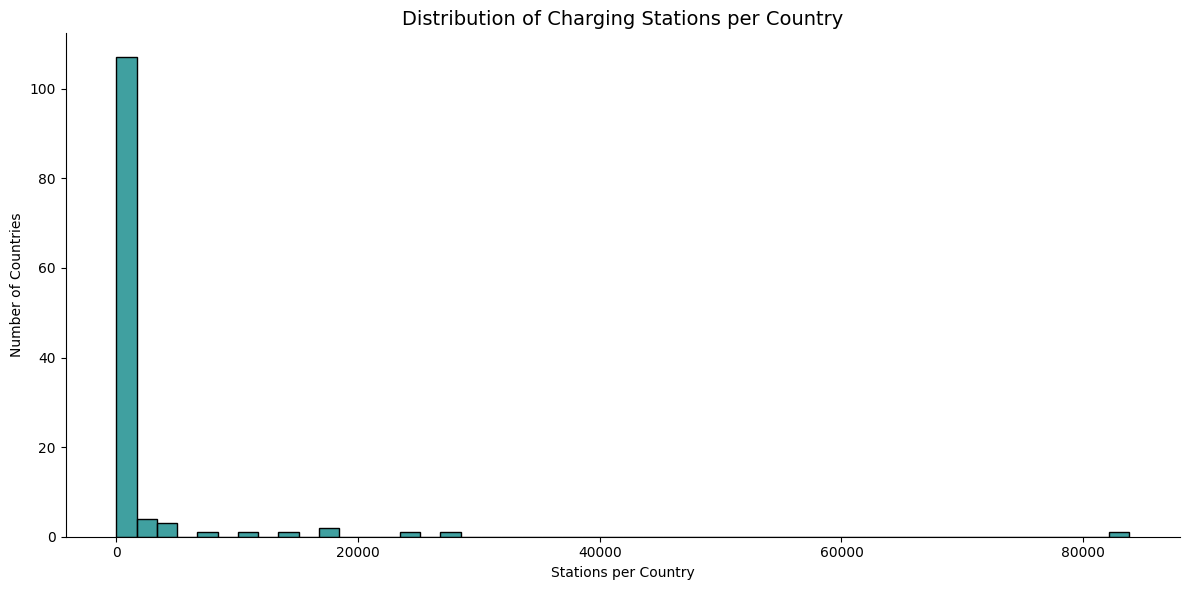

In [10]:
sns.histplot(world["count"], bins=50, color="teal")
plt.title("Distribution of Charging Stations per Country", fontsize=14)
plt.xlabel("Stations per Country")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

## Top Countries by Stations

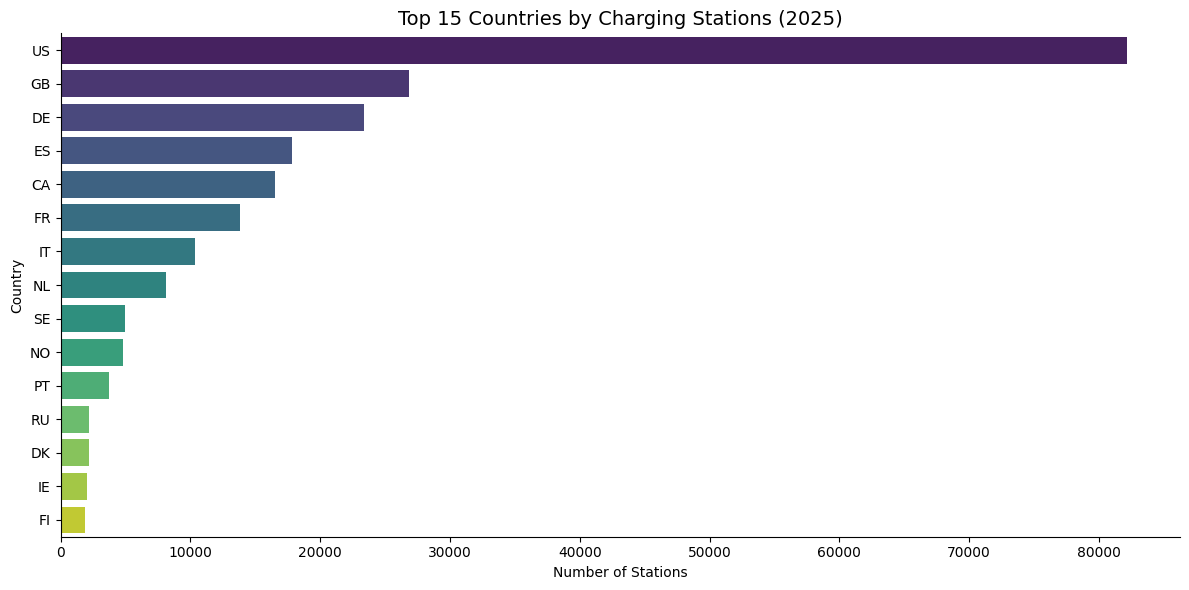

In [11]:
top_countries = country_dash.sort_values("stations", ascending=False).head(15)

sns.barplot(
    data=top_countries,
    x="stations",
    y="country_code",
    order=top_countries["country_code"],   
    palette="viridis"
)
plt.title("Top 15 Countries by Charging Stations (2025)", fontsize=14)
plt.xlabel("Number of Stations")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## Fast vs Normal Stations

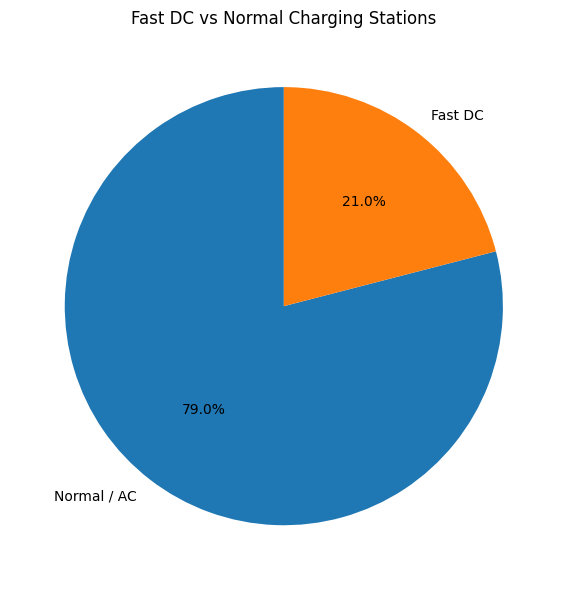

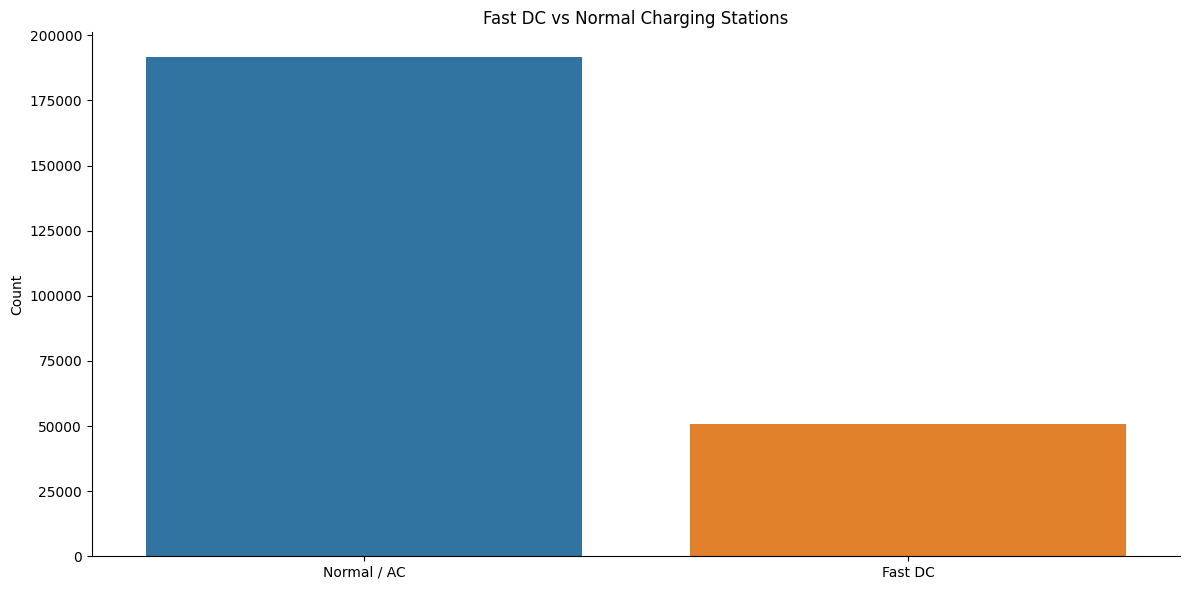

In [12]:
# Pie Chart
order = [False, True]
counts = charging["is_fast_dc"].value_counts().reindex(order, fill_value=0)
plt.pie(counts.values, labels=["Normal / AC","Fast DC"], autopct="%1.1f%%", startangle=90)
plt.title("Fast DC vs Normal Charging Stations")
plt.tight_layout()
plt.show()

# Bar Plot
counts = charging["is_fast_dc"].value_counts().reindex([False, True], fill_value=0)
sns.barplot(x=["Normal / AC","Fast DC"], y=counts.values)
plt.title("Fast DC vs Normal Charging Stations")
plt.ylabel("Count")
plt.xlabel("")
plt.tight_layout()
plt.show()


## Fast share with min threshold 

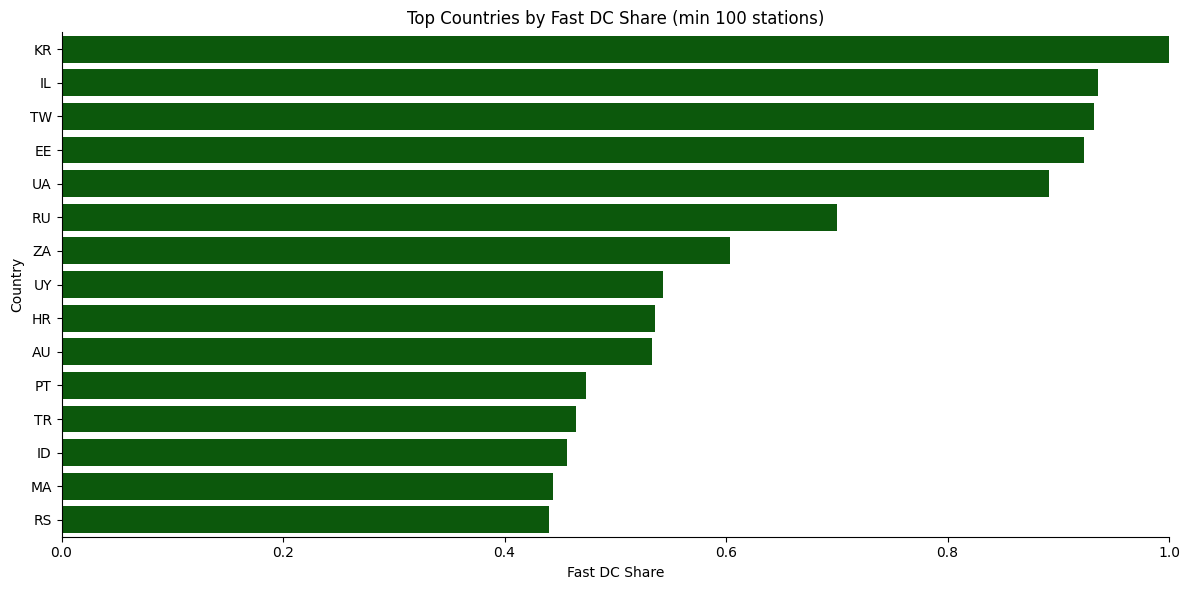

In [13]:
tmp = (
    charging.groupby("country_code")["is_fast_dc"].agg(["mean","count"])
    .rename(columns={"mean":"fast_share","count":"n_stations"})
    .reset_index()
)
tmp = tmp[tmp["n_stations"]>=100].sort_values("fast_share", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=tmp, x="fast_share", y="country_code", order=tmp["country_code"], color="darkgreen")
plt.title("Top Countries by Fast DC Share (min 100 stations)")
plt.xlabel("Fast DC Share")
plt.ylabel("Country")
plt.xlim(0,1)
plt.tight_layout()
plt.show()


## Top Cities by Charging Stations

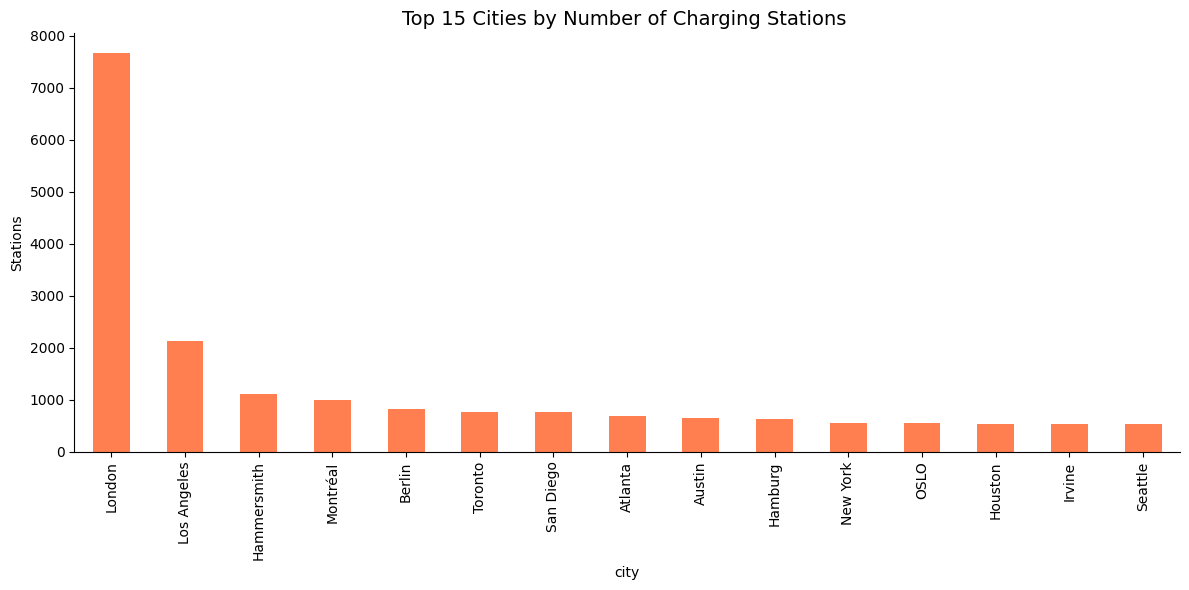

In [14]:
city_counts = charging.loc[charging["city"] != "Unknown", "city"] \
                      .value_counts().head(15)

city_counts.plot(kind="bar", color="coral")
plt.title("Top 15 Cities by Number of Charging Stations ", fontsize=14)
plt.ylabel("Stations")
plt.tight_layout()
plt.show()


## EV Models Timeline

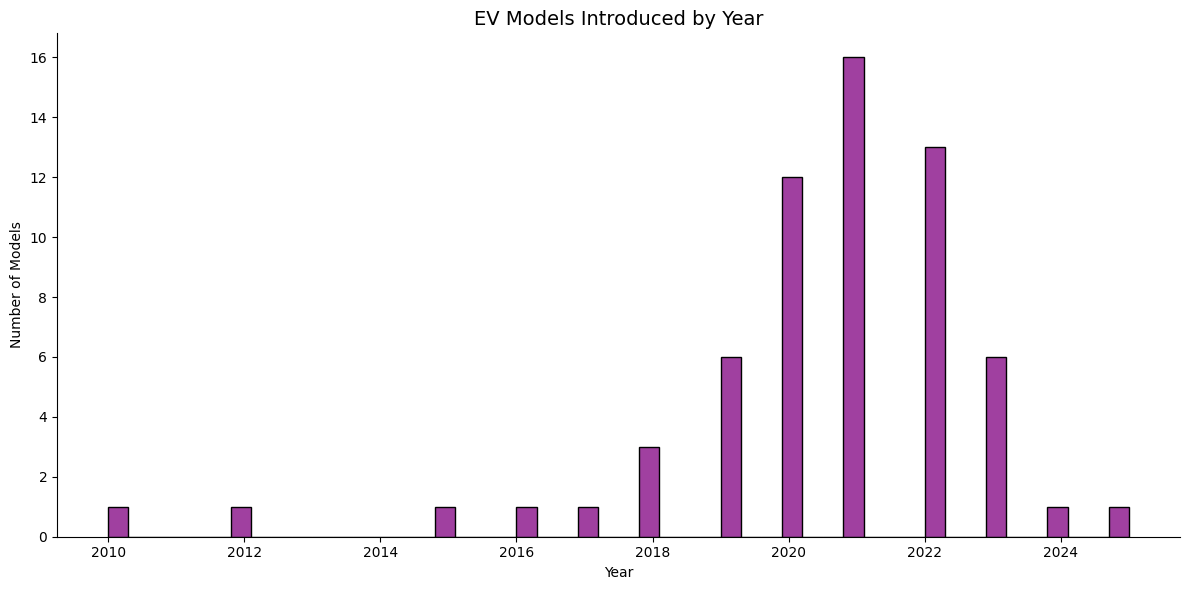

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(ev_models["first_year"], bins=50, color="purple")
plt.title("EV Models Introduced by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.show()

## Popular EV Makes

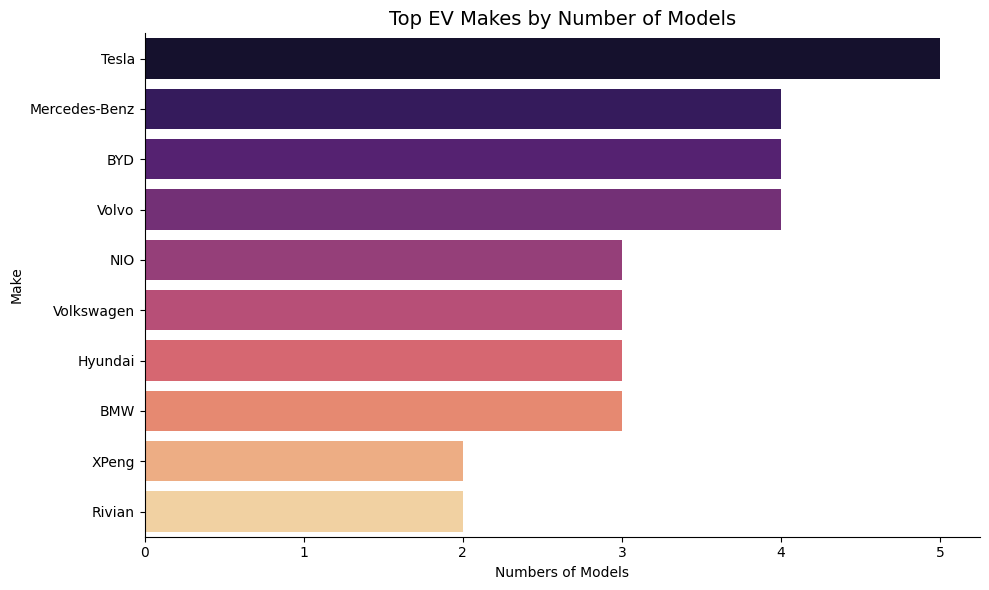

In [16]:
top_makes = ev_models["make"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette="magma")
plt.title("Top EV Makes by Number of Models" , fontsize=14)
plt.xlabel("Numbers of Models")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

## EV Models by Body Style

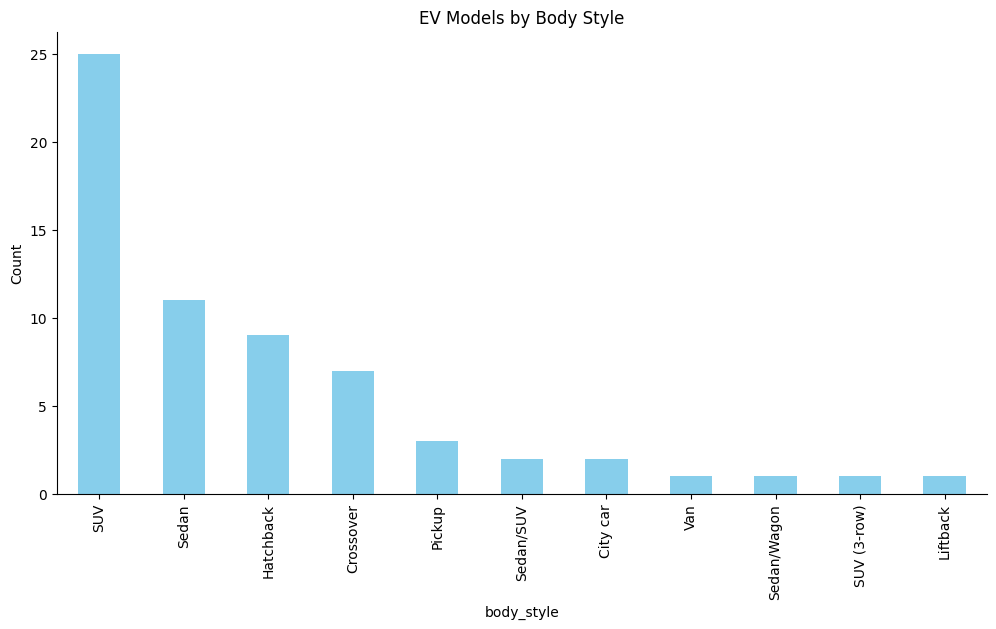

In [17]:
ev_models["body_style"].value_counts().plot(kind="bar", color="skyblue")
plt.title("EV Models by Body Style")
plt.ylabel("Count")
plt.show()

## Scatter plot

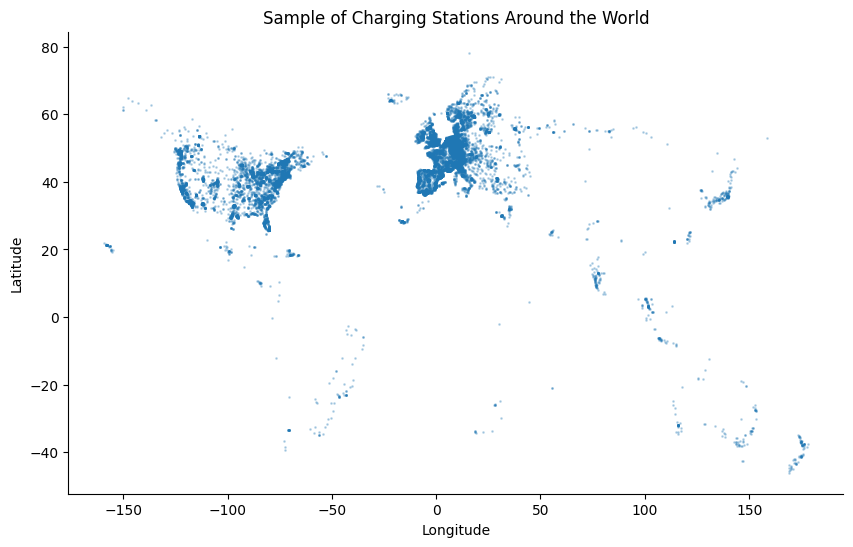

In [18]:
sample = charging.sample(20000, random_state=SEED)
plt.figure(figsize=(10,6))
plt.scatter(sample["longitude"], sample["latitude"], s=1, alpha=0.25)
plt.title("Sample of Charging Stations Around the World")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Power Buckets

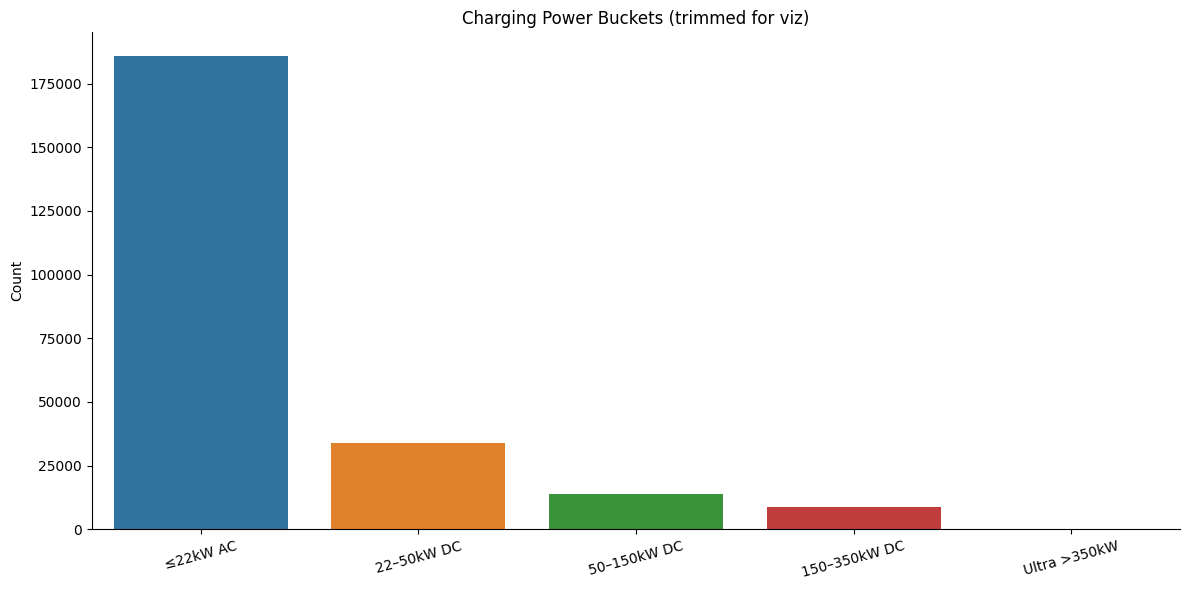

In [19]:
bucket_counts = power_bucket_viz.value_counts().reindex(power_labels, fill_value=0)
sns.barplot(x=bucket_counts.index, y=bucket_counts.values)
plt.title("Charging Power Buckets (trimmed for viz)")
plt.xticks(rotation=15)
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Average Ports by Station

Avg ports — Normal/AC: 1.70 | Fast DC: 2.92


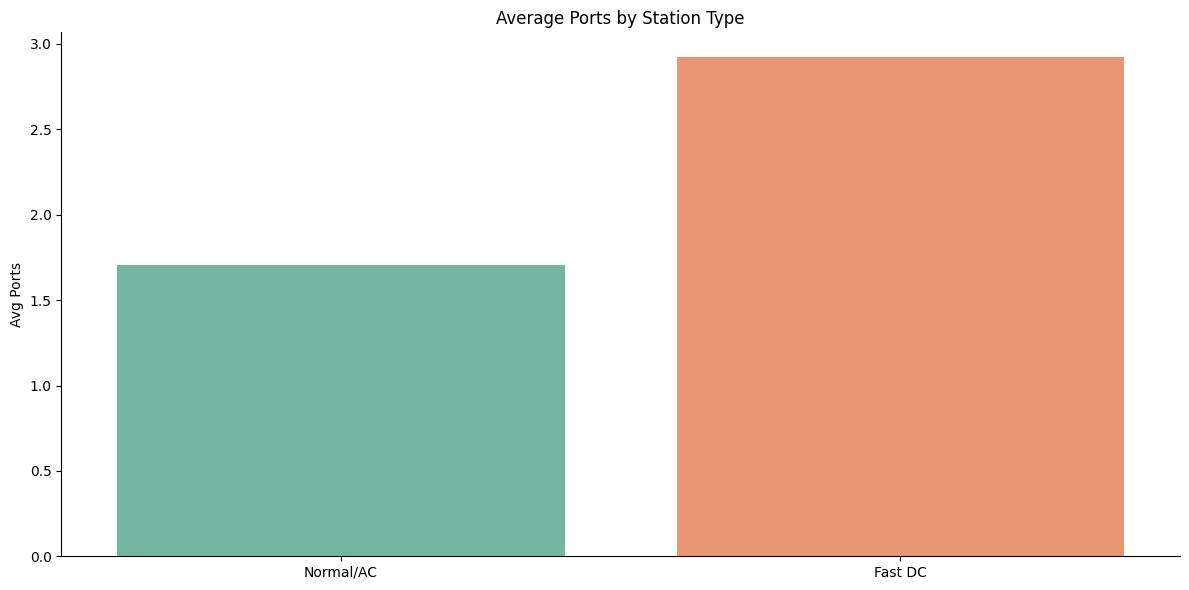

In [20]:
grp = charging.groupby("is_fast_dc")["ports"].mean().rename(index={False:"Normal/AC", True:"Fast DC"})
print(f"Avg ports — Normal/AC: {grp['Normal/AC']:.2f} | Fast DC: {grp['Fast DC']:.2f}")

sns.barplot(x=grp.index, y=grp.values, palette="Set2")
plt.title("Average Ports by Station Type")
plt.xlabel("")
plt.ylabel("Avg Ports")
plt.tight_layout()
plt.show()


## Ports vs Fast DC


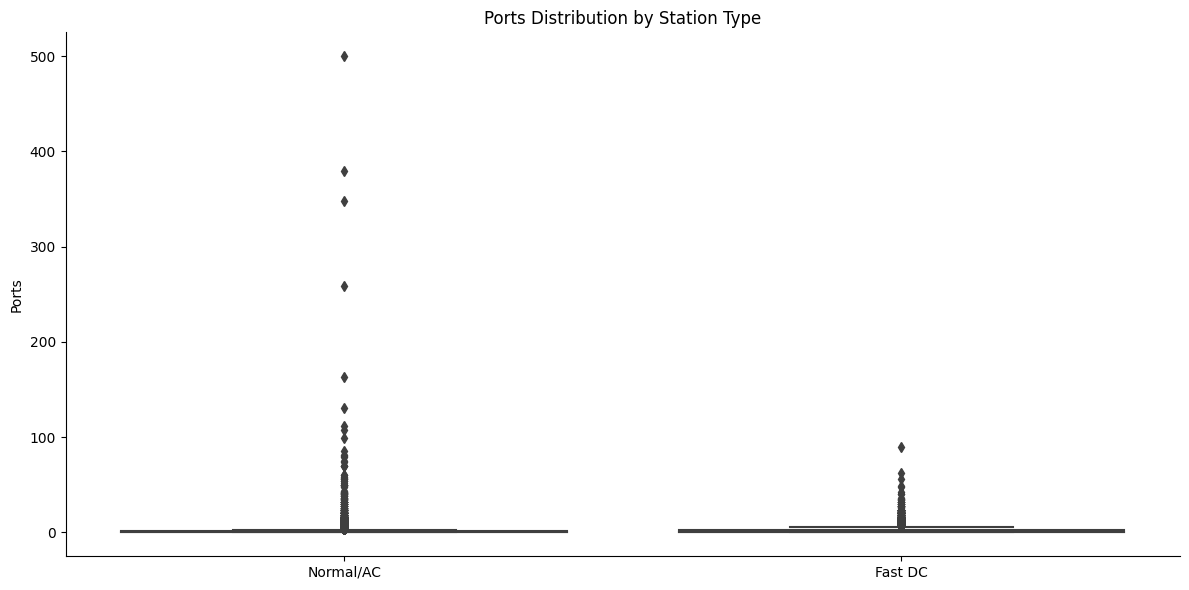

In [21]:
ax = sns.boxplot(data=charging.sample(min(50000, len(charging)), random_state=42),
                 x="is_fast_dc", y="ports")
ax.set_xticklabels(["Normal/AC","Fast DC"])
plt.title("Ports Distribution by Station Type")
plt.xlabel("")
plt.ylabel("Ports")
plt.tight_layout()
plt.show()


## Cumulative EV Models Over Years

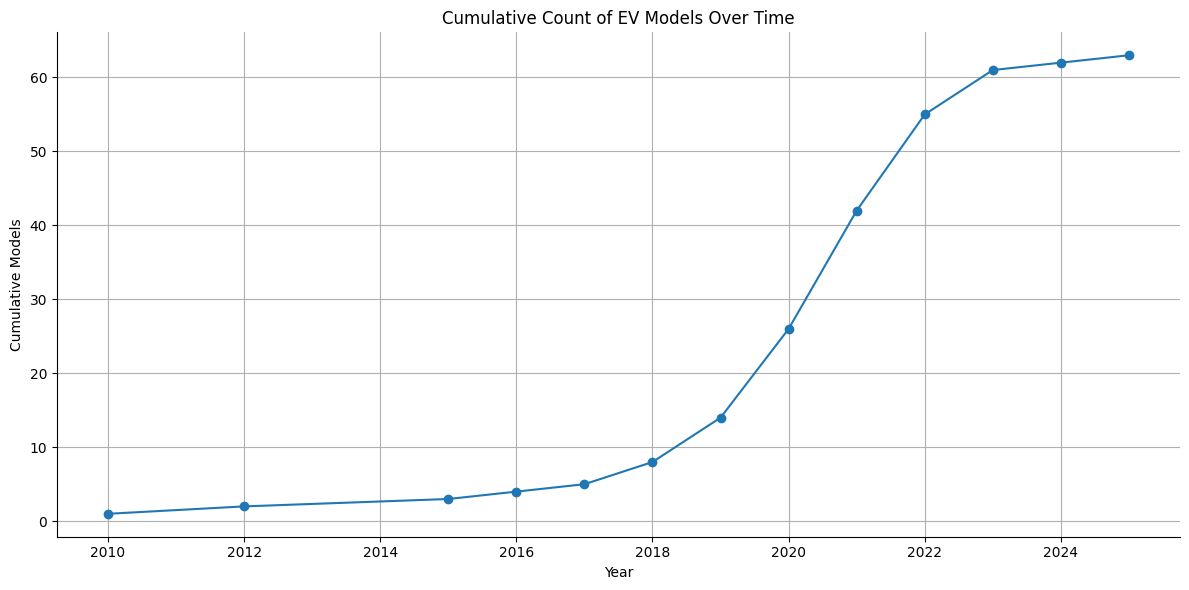

In [22]:
years = ev_models["first_year"].dropna().astype(int)
s = years.value_counts().sort_index()
cum = s.cumsum()

plt.figure(figsize=(12,6))
plt.plot(cum.index, cum.values, marker="o")
plt.title("Cumulative Count of EV Models Over Time")
plt.xlabel("Year")
plt.ylabel("Cumulative Models")
plt.grid(True)
plt.tight_layout()
plt.show()


# Insights

In [23]:
def pct(x): return f"{x*100:.1f}%"
countries_covered = world["country"].nunique() if "country" in world.columns else world["country_code"].nunique()
print("-"*60)
print("Quick Insight Pack:")
print(f"- Total stations: {len(charging):,}")
print(f"- Countries covered: {countries_covered}")
print(f"- Cities with stations: {charging['city'].nunique()}")
print(f"- Global Fast DC share: {pct(charging['is_fast_dc'].mean())}")
print(f"- Max power (kW): {charging['power_kw'].max():,.0f}")
print(f"- 99th pct power (kW): {charging['power_kw'].quantile(0.99):,.0f}")
mk = ev_models['make'].value_counts()
print(f"- Top make by models: {mk.idxmax()} ({mk.max()})")


------------------------------------------------------------
Quick Insight Pack:
- Total stations: 242,416
- Countries covered: 122
- Cities with stations: 41815
- Global Fast DC share: 21.0%
- Max power (kW): 1,000,000
- 99th pct power (kW): 350
- Top make by models: Tesla (5)
